<a href="https://colab.research.google.com/github/gabrielalastra/FemicidesSP/blob/main/FemicideSP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [107]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [108]:
#db = pd.read_excel('/content/Feminicidio_2015_2022.xlsx', sheet_name=None)
db = pd.read_excel('/content/Feminicidio_cleaned.xlsx')
db.head()

,MUNICIPIO_CIRCUNSCRICAO,DP_CIRCUNSCRICAO,ID_DELEGACIA,MÊS ESTATISTICA,ANO ESTATISTICA,DATAHORA_REGISTRO_BO,ANO_BO,MUNICIPIO_ELABORACAO,DATA_FATO,HORA_FATO,DESC_TIPOLOCAL,TIPO_PESSOA,IDADE_PESSOA,DATA_NASCIMENTO_PESSOA,COR_PELE,PROFISSAO,NATUREZA_APURADA,DESDOBRAMENTO
0,Viradouro,DM - Viradouro,100215.0,4.0,2015.0,2015-04-27 20:05:42,2015.0,VIRADOURO,2015-04-26,22:45:00,Residência,Vítima,54.0,1960-06-11 00:00:00,Parda,FAXINEIRO(A),HOMICÍDIO DOLOSO,Feminicídio-contra a mulher por razões da cond...
1,Itupeva,DM - Itupeva,70404.0,4.0,2015.0,2015-04-12 10:36:18,2015.0,ITUPEVA,2015-04-12,09:30:00,Templo e afins,Vítima,44.0,1970-04-16 00:00:00,Branca,COSTUREIRO(A),HOMICÍDIO DOLOSO,Feminicídio-contra a mulher por razões da cond...
2,Ubatuba,DM - Ubatuba,40304.0,4.0,2015.0,2015-04-18 20:23:50,2015.0,UBATUBA,2015-04-18,14:00:00,Area não ocupada,Vítima,37.0,1977-07-08 00:00:00,Parda,AJUDANTE,HOMICÍDIO DOLOSO,Feminicídio-contra a mulher por razões da cond...
3,São Paulo,049 DP - São Mateus,20249.0,4.0,2015.0,2015-04-25 00:40:09,2015.0,S.PAULO,2015-04-24,19:49:00,Via pública,Vítima,17.0,1997-12-31 00:00:00,Branca,ESTUDANTE,HOMICÍDIO DOLOSO,Feminicídio-contra a mulher por razões da cond...
4,Suzano,002 DP - Suzano,30309.0,5.0,2015.0,2015-05-16 14:37:19,2015.0,SUZANO,2015-05-16,06:00:00,Residência,Vítima,20.0,1994-07-22 00:00:00,Branca,PRENDAS DOMESTICAS,HOMICÍDIO DOLOSO,Feminicídio-contra a mulher por razões da cond...


In [109]:
#display(db)
#display(db['2021'])

In [110]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 915 entries, 0 to 914
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   MUNICIPIO_CIRCUNSCRICAO  915 non-null    object        
 1   DP_CIRCUNSCRICAO         915 non-null    object        
 2   ID_DELEGACIA             914 non-null    float64       
 3   MÊS ESTATISTICA          915 non-null    float64       
 4   ANO ESTATISTICA          915 non-null    float64       
 5   DATAHORA_REGISTRO_BO     915 non-null    object        
 6   ANO_BO                   915 non-null    float64       
 7   MUNICIPIO_ELABORACAO     915 non-null    object        
 8   DATA_FATO                915 non-null    datetime64[ns]
 9   HORA_FATO                904 non-null    object        
 10  DESC_TIPOLOCAL           915 non-null    object        
 11  TIPO_PESSOA              915 non-null    object        
 12  IDADE_PESSOA             908 non-nul

<h2 align='center'>Cleaning</h2>
<hr color='yellow'>

In [111]:
db=db.drop(columns=['ANO ESTATISTICA', 'MÊS ESTATISTICA'])

In [112]:
db['DATA_NASCIMENTO_PESSOA'] = pd.to_datetime(db['DATA_NASCIMENTO_PESSOA'], errors='coerce')

In [113]:
db['DATAHORA_REGISTRO_BO'] = pd.to_datetime(db['DATAHORA_REGISTRO_BO'], errors='coerce')

In [114]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 915 entries, 0 to 914
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   MUNICIPIO_CIRCUNSCRICAO  915 non-null    object        
 1   DP_CIRCUNSCRICAO         915 non-null    object        
 2   ID_DELEGACIA             914 non-null    float64       
 3   DATAHORA_REGISTRO_BO     867 non-null    datetime64[ns]
 4   ANO_BO                   915 non-null    float64       
 5   MUNICIPIO_ELABORACAO     915 non-null    object        
 6   DATA_FATO                915 non-null    datetime64[ns]
 7   HORA_FATO                904 non-null    object        
 8   DESC_TIPOLOCAL           915 non-null    object        
 9   TIPO_PESSOA              915 non-null    object        
 10  IDADE_PESSOA             908 non-null    object        
 11  DATA_NASCIMENTO_PESSOA   850 non-null    datetime64[ns]
 12  COR_PELE                 915 non-nul

In [115]:
#convert objt to int
db['IDADE_PESSOA'] = pd.to_numeric(db['IDADE_PESSOA'], errors='coerce').convert_dtypes() 

In [116]:
db['ANO_BO'] = pd.to_numeric(db['ANO_BO'], errors='coerce').convert_dtypes() 

In [117]:
db['ID_DELEGACIA'] = pd.to_numeric(db['ID_DELEGACIA'], errors='coerce').convert_dtypes() 

In [140]:
#convert objt to str
db['COR_PELE'] = db['COR_PELE'].convert_dtypes(convert_string=True)

In [141]:
db['TIPO_PESSOA'] = db['TIPO_PESSOA'].convert_dtypes(convert_string=True)

In [144]:
db['TIPO_PESSOA'].value_counts()

Vítima                 913
Autor/Vitima             1
Encontro de Cadáver      1
Name: TIPO_PESSOA, dtype: Int64

In [143]:
db['TIPO_PESSOA'] = db['TIPO_PESSOA'].str.strip()

In [138]:
db['DESC_TIPOLOCAL'] = db['DESC_TIPOLOCAL'].convert_dtypes(convert_string=True)

In [139]:
#remove space in the string
db['DESC_TIPOLOCAL'] = db['DESC_TIPOLOCAL'].str.strip()

In [125]:
db['DESC_TIPOLOCAL'].value_counts()

Residência                    610
Via pública                   189
Comércio e serviços            21
Unidade rural                  19
Area não ocupada               14
Saúde                          11
Hospedagem                      9
Condominio Residencial          8
Rodovia/Estrada                 8
Restaurante e afins             6
Lazer e recreação               5
Estabelecimento prisional       3
Escritório                      3
Templo e afins                  2
Favela                          2
Estabelecimento industrial      1
Serviços e bens públicos        1
Repartição Pública              1
Condominio Comercial            1
Estabelecimento de ensino       1
Name: DESC_TIPOLOCAL, dtype: int64

In [135]:
db['PROFISSAO'] = db['PROFISSAO'].convert_dtypes(convert_string=True)

In [136]:
db['PROFISSAO'] = db['PROFISSAO'].str.strip()

In [122]:
db['PROFISSAO'] = db['PROFISSAO'].replace(['nan'], 'NAO INFORMADA')

In [123]:
db['PROFISSAO'].value_counts()

NAO INFORMADA             382
PRENDAS DOMESTICAS        101
ESTUDANTE                  73
DESEMPREGADO(A)            19
APOSENTADO(A)              19
                         ... 
MEDICO(A)                   1
TECNICO EM VETERINARIA      1
DENTISTA                    1
PROMOTOR DE EVENTOS         1
EMBALADOR(A)                1
Name: PROFISSAO, Length: 106, dtype: int64

In [127]:
db.isnull().value_counts()

MUNICIPIO_CIRCUNSCRICAO  DP_CIRCUNSCRICAO   ID_DELEGACIA  DATAHORA_REGISTRO_BO  ANO_BO  MUNICIPIO_ELABORACAO  DATA_FATO  HORA_FATO  DESC_TIPOLOCAL  TIPO_PESSOA  IDADE_PESSOA  DATA_NASCIMENTO_PESSOA  COR_PELE  PROFISSAO  NATUREZA_APURADA  DESDOBRAMENTO
False                    False              False         False                 False   False                 False      False      False           False        False         False                   False     False      False             False            839
                                                          True                  False   False                 False      False      False           False        True          True                    False     False      False             False             37
                                                          False                 False   False                 False      False      False           False        True          True                    False     False      False     

In [145]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 915 entries, 0 to 914
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   MUNICIPIO_CIRCUNSCRICAO  915 non-null    object        
 1   DP_CIRCUNSCRICAO         915 non-null    object        
 2   ID_DELEGACIA             914 non-null    Int64         
 3   DATAHORA_REGISTRO_BO     867 non-null    datetime64[ns]
 4   ANO_BO                   915 non-null    Int64         
 5   MUNICIPIO_ELABORACAO     915 non-null    object        
 6   DATA_FATO                915 non-null    datetime64[ns]
 7   HORA_FATO                904 non-null    object        
 8   DESC_TIPOLOCAL           915 non-null    string        
 9   TIPO_PESSOA              915 non-null    string        
 10  IDADE_PESSOA             846 non-null    Int64         
 11  DATA_NASCIMENTO_PESSOA   850 non-null    datetime64[ns]
 12  COR_PELE                 915 non-nul

In [154]:
db['DESDOBRAMENTO'].value_counts()

Feminicídio-contra a mulher por razões da condição de sexo feminino.               913
A pena do feminicídio é aumentada de 1/3 (um terço) até a metade se o crime for      2
Name: DESDOBRAMENTO, dtype: int64

In [153]:
db['DESDOBRAMENTO'] = db['DESDOBRAMENTO'].replace(['Feminicídio-contra a mulher por razões da condição de sexo feminino'], 
                                                  'Feminicídio-contra a mulher por razões da condição de sexo feminino.')

In [156]:
db['DESDOBRAMENTO'] = db['DESDOBRAMENTO'].convert_dtypes(convert_string=True)

In [158]:
db['NATUREZA_APURADA'] = db['NATUREZA_APURADA'].convert_dtypes(convert_string=True)

In [159]:
db['NATUREZA_APURADA'].value_counts()

HOMICÍDIO DOLOSO                                                                                               833
Homicídio qualificado (art. 121, §2o.)                                                                          52
Homicídio qualificado (art. 121, §2o.), Violência Doméstica                                                     13
Homicídio simples (art. 121)                                                                                    13
Dano qualificado (art.163,par.único, II), Homicídio qualificado (art. 121, §2o.), Violência Doméstica            1
Destruição, subtração ou ocultação de cadáver (art. 211), Homicídio qualificado (art. 121, §2o.)                 1
Ameaça (art. 147), Homicídio qualificado (art. 121, §2o.), Lesão corporal (art. 129), Violência Doméstica,       1
Morte suspeita                                                                                                   1
Name: NATUREZA_APURADA, dtype: Int64

In [160]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 915 entries, 0 to 914
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   MUNICIPIO_CIRCUNSCRICAO  915 non-null    object        
 1   DP_CIRCUNSCRICAO         915 non-null    object        
 2   ID_DELEGACIA             914 non-null    Int64         
 3   DATAHORA_REGISTRO_BO     867 non-null    datetime64[ns]
 4   ANO_BO                   915 non-null    Int64         
 5   MUNICIPIO_ELABORACAO     915 non-null    object        
 6   DATA_FATO                915 non-null    datetime64[ns]
 7   HORA_FATO                904 non-null    object        
 8   DESC_TIPOLOCAL           915 non-null    string        
 9   TIPO_PESSOA              915 non-null    string        
 10  IDADE_PESSOA             846 non-null    Int64         
 11  DATA_NASCIMENTO_PESSOA   850 non-null    datetime64[ns]
 12  COR_PELE                 915 non-nul

<h2 align='center'>Quick View</h2>
<hr color='yellow'>

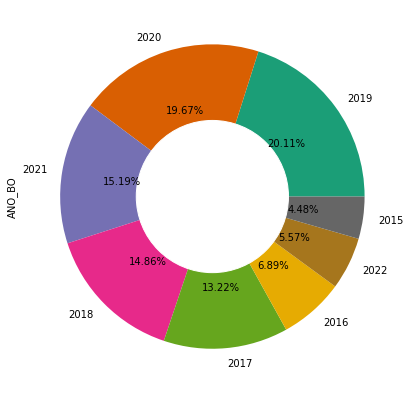

In [130]:
plt.figure(figsize=[7,7])
db['ANO_BO'].value_counts().plot(kind='pie',
                                   colormap='Dark2',
                                   autopct='%.2f%%')
my_circle=plt.Circle( (0,0), 0.5, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.show()

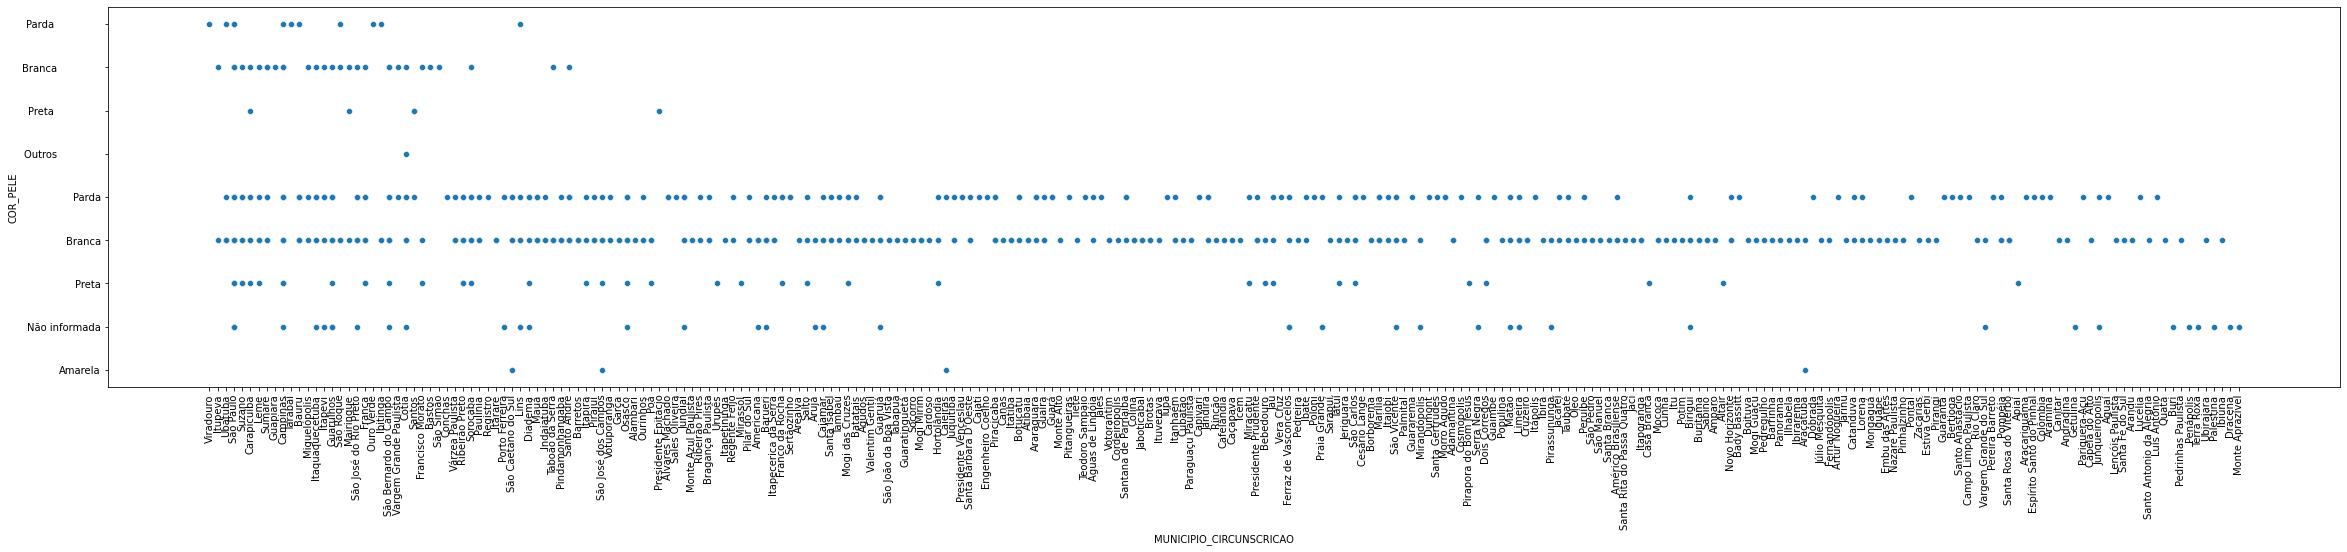

In [131]:
plt.figure(figsize=[40,7])
ax=sns.scatterplot(data=db, x="MUNICIPIO_CIRCUNSCRICAO", y="COR_PELE")
ax.tick_params(axis='x', rotation=90)
plt.show()

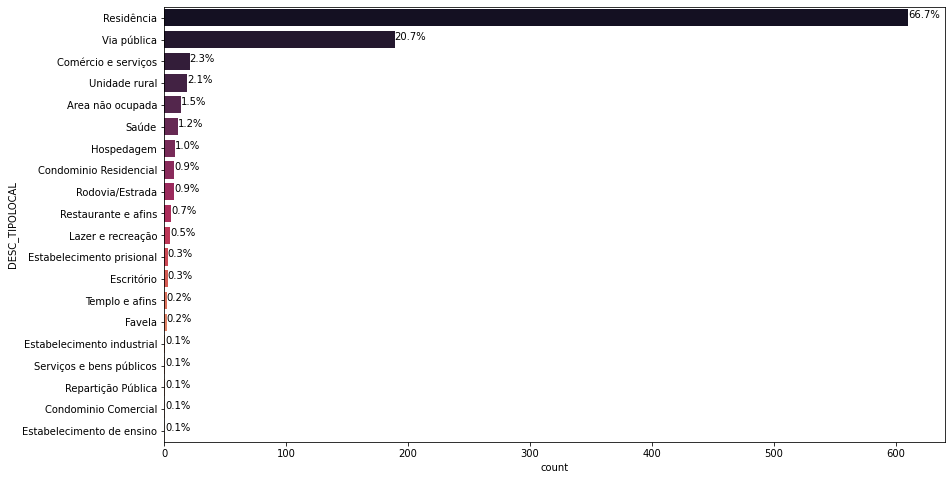

In [132]:
plt.figure(figsize=[14,8])
ax = sns.countplot(y="DESC_TIPOLOCAL", data=db, palette='rocket', order=db['DESC_TIPOLOCAL'].value_counts().index)
total = len(db['DESC_TIPOLOCAL'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))
plt.show()

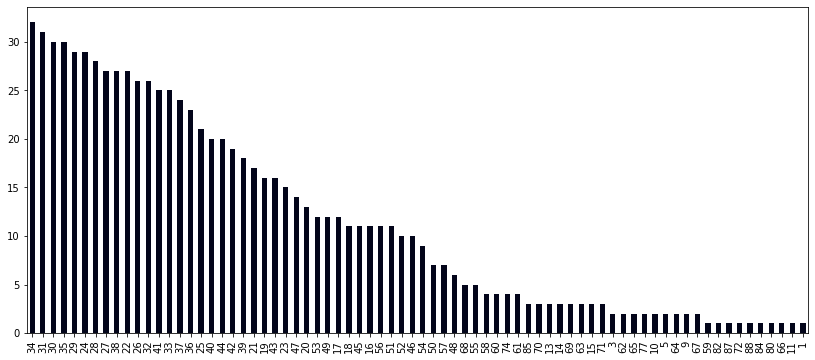

In [133]:
plt.figure(figsize=[14,6])
db['IDADE_PESSOA'].value_counts().plot(kind='bar',
                                   colormap='rocket')

In [161]:
#save
db.to_excel(r'Femicide_cleaned.xlsx', index = False, header=True)
